In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
df = pd.read_csv('../data/States_clean_df.csv')

In [4]:
df = df[df['Party'].isin(['R', 'D'])]

In [5]:
df = df.rename(columns={'CRPICO': 'Incumbent'})

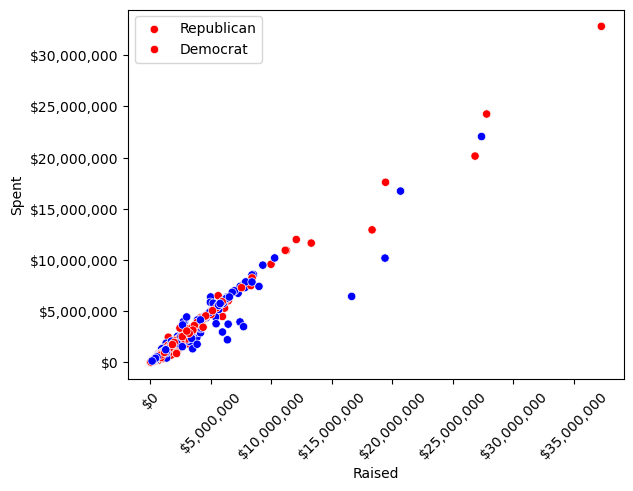

In [26]:
fig, ax = plt.subplots()

sns.scatterplot(data = df, x = 'Raised', y = 'Spent', 
                hue = 'Party', palette = ['red', 'blue'])
ax.yaxis.set_major_formatter('${x:,.0f}')
ax.xaxis.set_major_formatter('${x:,.0f}')
plt.yticks()
plt.legend(['Republican', 'Democrat'])
plt.xticks(rotation=45);

In [7]:
df['Percentage_Spent' = df.groupby(['State', 'District'])['Spent'].transform(lambda x: x / x.sum

In [9]:
df.groupby(['State', 'District'])[['Winner', 'Incumbent']].apply(lambda x: (x['Winner'] == 1) & (x['Incumbent'] == 'C')).sum()

12

In [40]:
df

,State,District,FirstLastP,Party,Raised,Spent,Difference,Outcome,Winner,Incumbent,Percentage_Spent
0,Alabama,1,Jerry Carl (R),R,1971321.50,1859348.91,111972.59,W,1,O,95.93
1,Alabama,1,James Averhart (D),D,80094.95,78973.24,1121.71,L,0,O,4.07
2,Alabama,2,Barry Moore (R),R,650806.75,669367.70,-18560.95,W,1,O,92.28
3,Alabama,2,Phyllis Harvey-Hall (D),D,56049.68,55988.07,61.61,L,0,O,7.72
4,Alabama,3,Mike D Rogers (R),R,1193111.43,1218563.76,-25452.33,W,1,I,96.75
...,...,...,...,...,...,...,...,...,...,...,...
846,Wisconsin,7,Tricia Zunker (D),D,1261957.30,1232690.26,29267.04,L,0,C,32.89
847,Wisconsin,8,Mike Gallagher (R),R,3202904.74,2841800.71,361104.03,W,1,I,87.66
848,Wisconsin,8,Amanda Stuck (D),D,416978.45,399915.94,17062.51,L,0,C,12.34
849,Wyoming,1,Liz Cheney (R),R,3003883.34,3060166.78,-56283.44,W,1,I,95.86


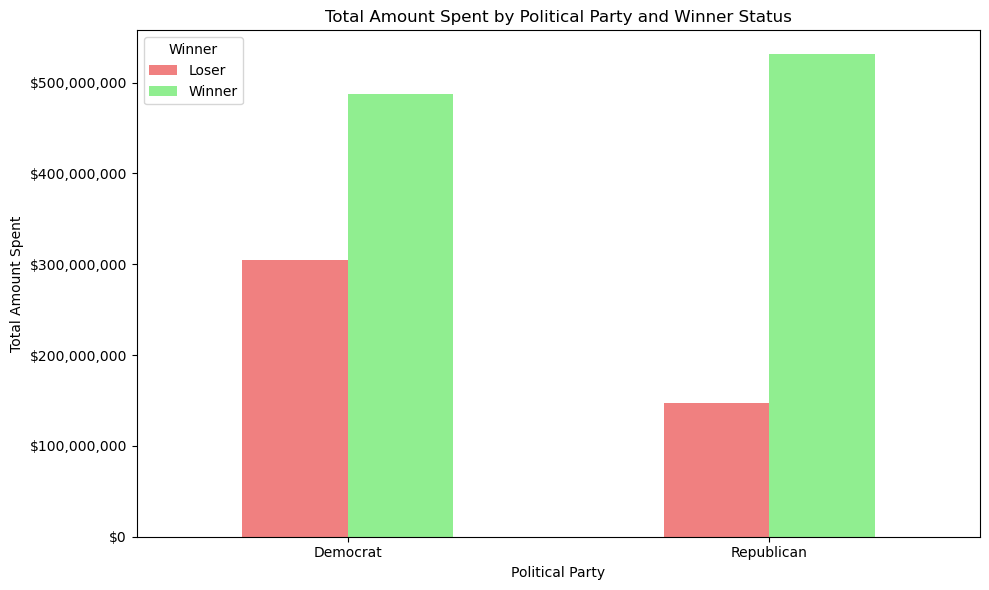

In [72]:
party_winner_funding = df.groupby(['Party', 'Winner'])['Spent'].sum().unstack().fillna(0)

# Create a bar plot
ax = party_winner_funding.plot(kind='bar', stacked=False, figsize=(10, 6), color=['lightcoral', 'lightgreen'])

# Set labels and title
plt.xlabel('Political Party')
plt.ylabel('Total Amount Spent')
plt.title('Total Amount Spent by Political Party and Winner Status')
plt.xticks(rotation=0)  # Rotate x-ticks to horizontal

# Rename x-ticks
ax.set_xticklabels(['Democrat', 'Republican'])
ax.yaxis.set_major_formatter('${x:,.0f}')

plt.legend(title='Winner', labels=['Loser', 'Winner'])
plt.tight_layout()

# Show the plot
plt.savefig('../images/winn_loss_party.png', dpi = 150)
plt.show();